<a href="https://colab.research.google.com/github/akashsmu/API/blob/main/training_demo_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# training demo for pytorch models

In [1]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'

Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

In [3]:
# standardize the training data
scaler = StandardScaler()
Xtr_standardized = scaler.fit_transform(Xtr) # revise this line as needed
Xts_standardized = scaler.transform(Xts) # revise this line as needed
ytr_standardized = ytr # revise this line as needed

# save the standardized training data
Xtr_savepath = 'Xtr_pytorch.csv'
Xts_savepath = 'Xts_pytorch.csv'
ytr_savepath = 'ytr_pytorch.csv'
yts_hat_savepath = 'yts_hat_pytorch.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

In [4]:
Xtr_py = pd.read_csv('Xtr_pytorch.csv',header = None)
ytr_py = pd.read_csv('ytr_pytorch.csv',header = None)


Xts_py = pd.read_csv('Xts_pytorch.csv',header = None)

print('The shape of the training data Xtr is {}'.format(Xtr_py.shape))
print('The shape of the training target ytr is {}'.format(ytr_py.shape))

print('The shape of the testing data Xts is {}'.format(Xts_py.shape))

The shape of the training data Xtr is (10000, 8)
The shape of the training target ytr is (10000, 1)
The shape of the testing data Xts is (10000, 8)


In [5]:
np.mean(Xts_py,axis=0)

0    0.026618
1   -0.014614
2    0.024107
3    0.005479
4    0.027168
5   -0.007291
6    0.023236
7    0.035538
dtype: float64

In [129]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

batch_size = 64

# TODO Convert the numpy arrays to tensors
Xtr_torch = torch.Tensor(Xtr_standardized)
ytr_torch = torch.Tensor(ytr_standardized)

Xts_torch = torch.Tensor(Xts_standardized)

# TODO Create a training/test dataset from the tensors
train_ds = TensorDataset(Xtr_torch,ytr_torch)
test_ds =  TensorDataset(Xts_torch)


# TODO Create a training/test data loader from datasets
train_loader = DataLoader(train_ds,batch_size=64,shuffle =True)
test_loader =  DataLoader(test_ds,batch_size=64, shuffle = True)

In [140]:
# create a model
d_in = Xtr_py.shape[1]
d_out = 1
nh = 256

class Net(nn.Module):
    def __init__(self,din,dout,nh):
      super(Net, self).__init__()
      self.relu = nn.LeakyReLU()
      self.sigmoid = nn.Sigmoid()
      self.Dense1 = nn.Linear(din,nh)
      self.Dense2 = nn.Linear(nh,dout)
      self.dropout = nn.Dropout(0.3)
    def forward(self,x):
      x = self.relu(self.Dense1(x))
      out = self.sigmoid(self.Dense2(x))
      return out


model = Net(d_in,d_out,nh)   
print(str(model))


Net(
  (relu): LeakyReLU(negative_slope=0.01)
  (sigmoid): Sigmoid()
  (Dense1): Linear(in_features=8, out_features=256, bias=True)
  (Dense2): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [142]:
# Defining the optimizer
import torch.optim as optim

lr = 1e-2
opt = optim.Adam(model.parameters(),lr=lr)
#opt = optim.SGD(model.parameters(), lr=lr, momentum=0.99, nesterov=True)
criterion = nn.BCELoss()

In [143]:
# TODO Train model for 10 epochs
num_epoch = 100

a_tr_loss = np.zeros([num_epoch])
a_tr_loss_1 = []
a_tr_accuracy = np.zeros([num_epoch])
a_ts_loss = np.zeros([num_epoch])
a_ts_accuracy = np.zeros([num_epoch])
batch_size =[]

for epoch in range(num_epoch):

    model.train() # put model in training mode
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    batch_loss_tr = []
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        #y_batch = y_batch.type(torch.float)
        out = model(x_batch)
        out = torch.flatten(out)
        #print(out.shape)
        # Compute Loss
        loss = criterion(out,y_batch)
        batch_loss_tr.append(loss.item())
        # Compute gradients using back propagation
        opt.zero_grad()
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        #print(out.data)
        # Do hard classification: index of largest score
        # _, predicted = torch.max(out.data, 1)
        # # Compute number of decision errors
        # total += y_batch.size(0)
        # batch_size.append(y_batch.size(0))
        # correct += (predicted == y_batch).sum().item()
        
    a_tr_loss[epoch]= np.mean(batch_loss_tr) # Compute average loss over epoch
    # a_tr_accuracy[epoch] = 100*correct/total
    print('Epoch: {0:2d}   Train Loss: {1:.3f}   '.format(epoch+1, a_tr_loss[epoch]))

Epoch:  1   Train Loss: 0.413   
Epoch:  2   Train Loss: 0.378   
Epoch:  3   Train Loss: 0.357   
Epoch:  4   Train Loss: 0.360   
Epoch:  5   Train Loss: 0.352   
Epoch:  6   Train Loss: 0.348   
Epoch:  7   Train Loss: 0.344   
Epoch:  8   Train Loss: 0.346   
Epoch:  9   Train Loss: 0.344   
Epoch: 10   Train Loss: 0.338   
Epoch: 11   Train Loss: 0.336   
Epoch: 12   Train Loss: 0.336   
Epoch: 13   Train Loss: 0.334   
Epoch: 14   Train Loss: 0.332   
Epoch: 15   Train Loss: 0.333   
Epoch: 16   Train Loss: 0.331   
Epoch: 17   Train Loss: 0.329   
Epoch: 18   Train Loss: 0.326   
Epoch: 19   Train Loss: 0.325   
Epoch: 20   Train Loss: 0.325   
Epoch: 21   Train Loss: 0.321   
Epoch: 22   Train Loss: 0.322   
Epoch: 23   Train Loss: 0.321   
Epoch: 24   Train Loss: 0.323   
Epoch: 25   Train Loss: 0.321   
Epoch: 26   Train Loss: 0.322   
Epoch: 27   Train Loss: 0.323   
Epoch: 28   Train Loss: 0.320   
Epoch: 29   Train Loss: 0.317   
Epoch: 30   Train Loss: 0.317   
Epoch: 31 

In [144]:
np.mean(a_tr_loss)

0.3100883160754564

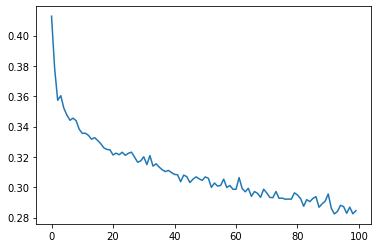

In [145]:
import matplotlib.pyplot as plt
plt.plot(a_tr_loss)

In [146]:
# compute the training accuracy
with torch.no_grad():
    predict = model(torch.Tensor(Xtr_standardized)).detach().numpy().ravel()

auc = roc_auc_score(ytr_standardized,predict)
print('training auc: ',auc)

training auc:  0.9430442265281165


In [147]:
bin_pred = np.round(predict)
value, count = np.unique(bin_pred,return_counts = True)
dict(zip(value, count))

{0.0: 3134, 1.0: 6866}

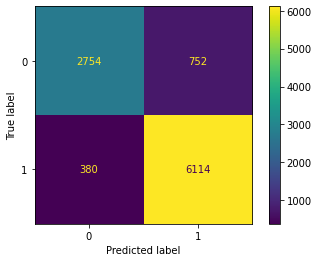

In [148]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytr_standardized, bin_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [149]:
from sklearn.metrics import classification_report
print(classification_report(ytr_standardized, bin_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      3506
         1.0       0.89      0.94      0.92      6494

    accuracy                           0.89     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.89      0.89      0.89     10000



In [150]:
# save the model: you must use the .pth format for pytorch models!
model_savepath = 'model.pth'

# To save a PyTorch model, we first pass an input through the model, 
# and then save the "trace". 
# For this purpose, we can use any input. 
# We will create a random input with the proper dimension.
x = torch.randn(d_in) # random input
x = x[None,:] # add singleton batch index
with torch.no_grad():
    traced_cell = torch.jit.trace(model, (x))

# Now we save the trace
torch.jit.save(traced_cell, model_savepath)

In [151]:
# generate kaggle submission file using the validation script
!python {"validation.py " + model_savepath + " --Xts_path " + Xts_savepath + " --Xtr_path " + Xtr_savepath + " --yts_hat_path " + yts_hat_savepath } 

training auc =  0.9430442265281165
test label confidences saved in yts_hat_pytorch.csv
